C:\Users\user\AppData\Local\Temp\ipykernel_17120\477759889.py:25: RuntimeWarning: invalid value encountered in double_scalars
  class_mean2 = (global_mean - cum_mean[threshold]) / class_prob2


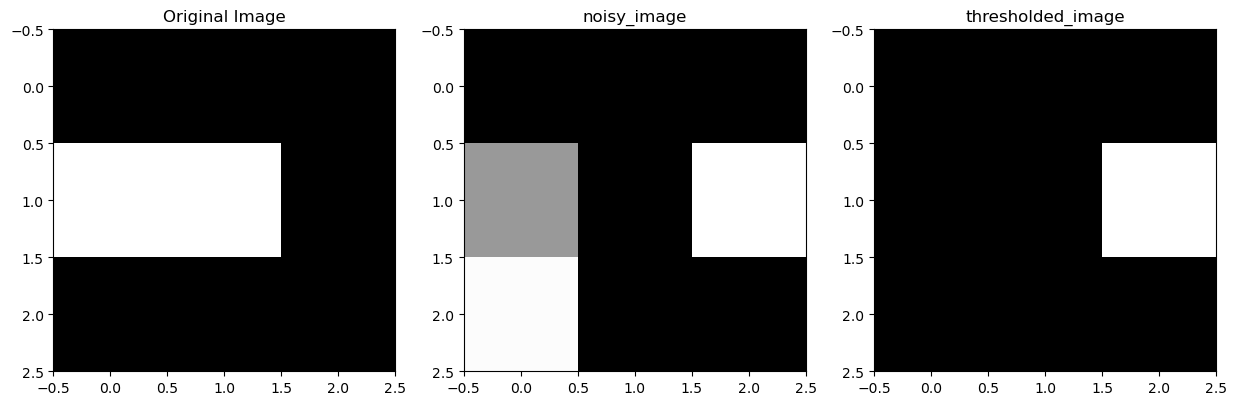

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def otsu_threshold(image):
    # Compute histogram and probabilities of each intensity level
    hist, bins = np.histogram(image, bins=range(257))
    prob = hist / float(np.sum(hist))
    
    # Compute cumulative sums
    cum_sum = np.cumsum(prob)
    cum_mean = np.cumsum(prob * np.arange(256))
    
    # Compute global mean intensity
    global_mean = cum_mean[-1]
    
    # Compute between-class variance for all possible thresholds
    threshold_values = range(1, 256)
    between_class_variances = np.zeros(len(threshold_values))
    
    for i, threshold in enumerate(threshold_values):
        # Compute class probabilities and means
        class_prob1 = cum_sum[threshold]
        class_prob2 = 1.0 - class_prob1
        class_mean1 = cum_mean[threshold] / class_prob1
        class_mean2 = (global_mean - cum_mean[threshold]) / class_prob2
        
        # Compute between-class variance
        between_class_variances[i] = class_prob1 * class_prob2 * (class_mean1 - class_mean2) ** 2
    

    optimal_threshold = threshold_values[np.argmax(between_class_variances)]
    

    thresholded_image = np.zeros_like(image)
    thresholded_image[image >= optimal_threshold] = 1
    
    return thresholded_image

def add_gaussian_noise(image, mean=0, std_dev=1):
    
    noise = np.random.normal(mean, std_dev, image.shape)
    
    noisy_image = image + noise
    
    noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)
    
    return noisy_image



image = np.zeros((3, 3), dtype=np.uint8)
image[1, 1] = 1
image[1, 0] = 1
noisy_image = add_gaussian_noise(image, mean=0, std_dev=50)

# Threshold noisy image using Otsu's algorithm
thresholded_image = otsu_threshold(noisy_image)

# Display original, noisy, and thresholded images

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(15, 5))

ax1.imshow(image, cmap='gray')
ax1.set_title('Original Image')

ax2.imshow(noisy_image, cmap='gray')
ax2.set_title('Noisy_image')

ax3.imshow(thresholded_image, cmap='gray')
ax3.set_title('Thresholded_image')

plt.show()